First we import UN_cities_data.csv, and then take a look at the data to make sure

In [5]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

%matplotlib inline 
cities_df = pd.read_csv('UN_cities_data.csv', sep='\t')
print(cities_df.head())
cities_df.shape

   Country code      Country  City Code    Urban Agglomeration  Latitude  \
0             4  Afghanistan      20002                  Kabul     34.54   
1            12      Algeria      20006  El Djazaïr  (Algiers)     36.76   
2            12      Algeria      20035          Wahran (Oran)     35.75   
3            24       Angola      20050                 Huambo    -12.76   
4            24       Angola      20049                 Luanda     -8.84   

   Longitude     1950     1955     1960      1965      ...           2010  \
0      69.17  128.931  184.622  264.803   368.809      ...       3052.000   
1       3.05  516.450  622.921  871.636  1081.394      ...       2850.907   
2      -0.63  268.935  286.368  304.936   324.697      ...        775.666   
3      15.75   15.306   23.818   37.069    47.875      ...       1038.581   
4      13.23  138.413  174.268  219.427   315.108      ...       4790.142   

       2015      2020      2025  Cyclone risk (0=low, 3=high)  Drought risk  \
0

(633, 28)

We get the average worldwide population on all cities for each year, then plot the data. from the plot we can see decade 2000-2010 has the fastest avg growth world wide

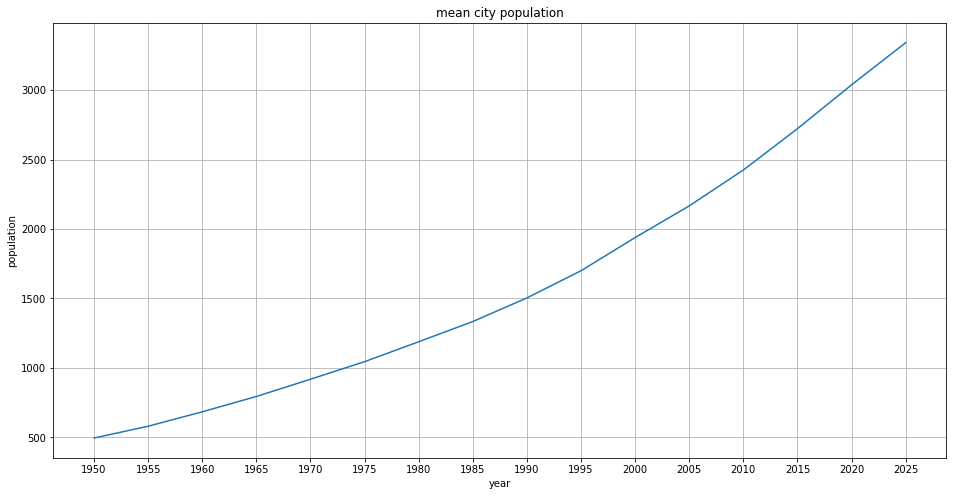

In [6]:
avg = cities_df.mean()[4:20]
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.plot(avg)
ax.set_title('mean city population')
ax.set_xlabel("year")
ax.set_ylabel("population")
plt.grid(True)
plt.show()

Now, we get the average population group by country, calculate total growth from 1950 to 2025 , we plot growth rate vs country. 
We get the top 5 fastest growth country to see more details

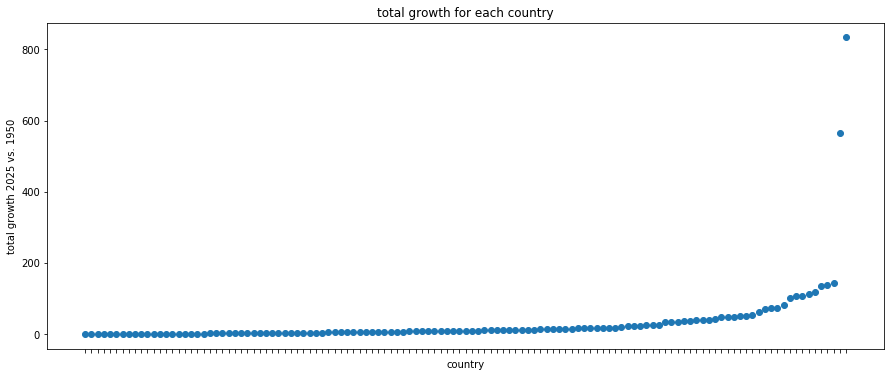

In [7]:
bycountry = cities_df.groupby('Country').mean()
bycountry['totalgrowth'] = (bycountry['2025'] - bycountry['1950'])/bycountry['1950']
bycountry.reset_index()
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
bycountry.loc[bycountry['totalgrowth'].idxmax()]
bycountry = bycountry.sort_values(by=['totalgrowth'])
ax.scatter(bycountry.index, bycountry.totalgrowth)
ax.set_title('total growth for each country')
ax.set_xlabel("country")
ax.set_ylabel("total growth 2025 vs. 1950")
ax.set_xticklabels([])
plt.show()
top5 = bycountry[-5:]
top5 = top5.loc[:,'1950':'2025']
countries = top5.index

We plot the top 5 high population growth countries, population grow fastest from 1990-2010 

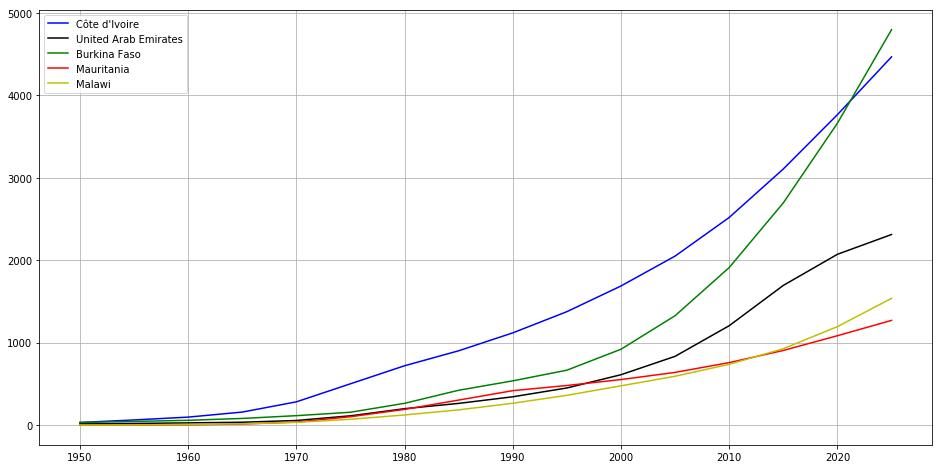

In [8]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

ax.plot([i for i in range(1950,2030, 5)], np.transpose(top5.iloc[:1,:]), c='b') # blue
ax.plot([i for i in range(1950,2030, 5)], np.transpose(top5.iloc[1:2,:]), c='k') # balck
ax.plot([i for i in range(1950,2030, 5)], np.transpose(top5.iloc[2:3,:]), c='g') # green
ax.plot([i for i in range(1950,2030, 5)], np.transpose(top5.iloc[3:4,:]), c='r') # red
ax.plot([i for i in range(1950,2030, 5)], np.transpose(top5.iloc[4:5,:]), c='y') # yellow
ax.legend(countries)
ax.grid(True)
plt.show()

We can also hist plot of the different risks levels frequency

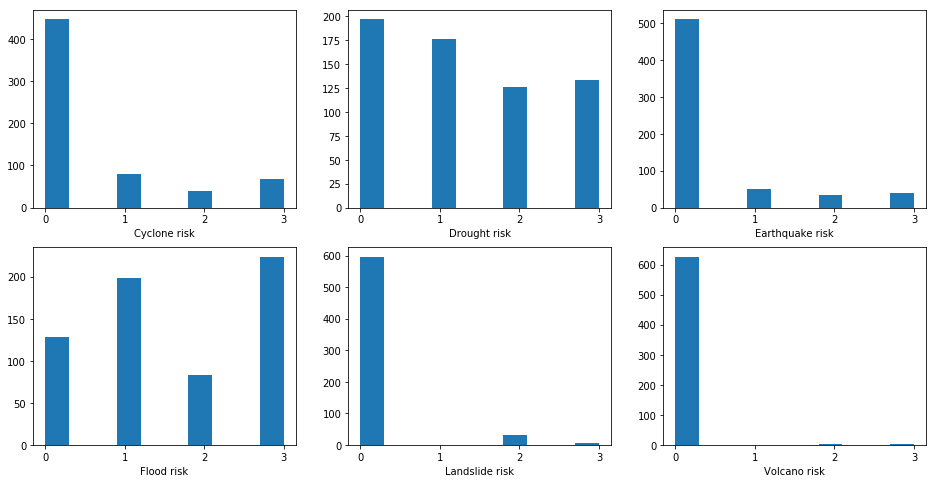

In [9]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)
ax1.hist(cities_df['Cyclone risk (0=low, 3=high)'])
ax1.set_xlabel('Cyclone risk')
ax2.hist(cities_df['Drought risk'])
ax2.set_xlabel('Drought risk')
ax3.hist(cities_df['Earthquake risk'])
ax3.set_xlabel('Earthquake risk')
ax4.hist(cities_df['Flood risk'])
ax4.set_xlabel('Flood risk')
ax5.hist(cities_df['Landslide risk'])
ax5.set_xlabel('Landslide risk')
ax6.hist(cities_df['Volcano risk'])
ax6.set_xlabel('Volcano risk')
ax1.set_xticks([0,1,2,3])
ax2.set_xticks([0,1,2,3])
ax3.set_xticks([0,1,2,3])
ax4.set_xticks([0,1,2,3])
ax5.set_xticks([0,1,2,3])
ax6.set_xticks([0,1,2,3])
plt.show()